In [1]:
import io
import numpy as np
import pandas as pd
from scipy import interpolate
import matplotlib.pyplot as plt

In [2]:
data = pd.read_fwf(io.StringIO("""
        0.894737        0.0             -1136.46
        0.894737        0.0526316       -1136.03
        0.894737        0.105263        -1131.54
        0.894737        0.157895        -1144.01
        0.894737        0.210526        -1150.88
        0.894737        0.263158        -1108.13
        0.894737        0.315789        -1126.4
        0.894737        0.368421        -1205.33
        0.894737        0.421053        -1125.91
        0.894737        0.473684        -1042.69
        0.894737        0.526316        -1221.64
        0.894737        0.578947        -1254.95
        0.894737        0.631579        -980.933
        0.894737        0.684211        -1084.14
        0.894737        0.736842        -1414.63
        0.894737        0.789474        -1114.38
        0.894737        0.842105        -838.015
        0.894737        0.894737        -1372.63
        0.894737        0.947368        -1469.1
        0.894737        1.0             -759.097"""), header=None, names=["u", "x", "y"])

In [3]:
def interpolates(y, z):
    plt.scatter(y, z, label='Data points', color='blue')

    # Divide data into intervals of 5 points and plot interpolation functions
    for i in range(0, len(y), 5):
        y_interval = y[i:i+6]
        z_interval = z[i:i+6]

        # Calculate interpolation function for the given interval
        poly_coeffs_interval = np.polyfit(y_interval, z_interval, 5)
        #print(f"Interpolation function for interval {i}-{i+5}: {poly_coeffs_interval[0]}*y^5 + {poly_coeffs_interval[1]}*y^4 + {poly_coeffs_interval[2]}*y^3 + {poly_coeffs_interval[3]}*y^2 + {poly_coeffs_interval[4]}*y + {poly_coeffs_interval[5]}\n")

        # Plot interpolation function
        y_interval_fit = np.linspace(min(y_interval), max(y_interval), 100)
        z_interval_fit = np.polyval(poly_coeffs_interval, y_interval_fit)
        plt.plot(y_interval_fit, z_interval_fit, linestyle='--', label=f'Interpolation {i}-{i+5}')

    plt.xlabel('y')
    plt.ylabel('z')
    plt.legend()
    plt.title('Interpolation for 5-point intervals')
    plt.show()

/tmp/ipykernel_3582/2072279711.py:1: RankWarning: Polyfit may be poorly conditioned
  interpolates(data.x, data.y)


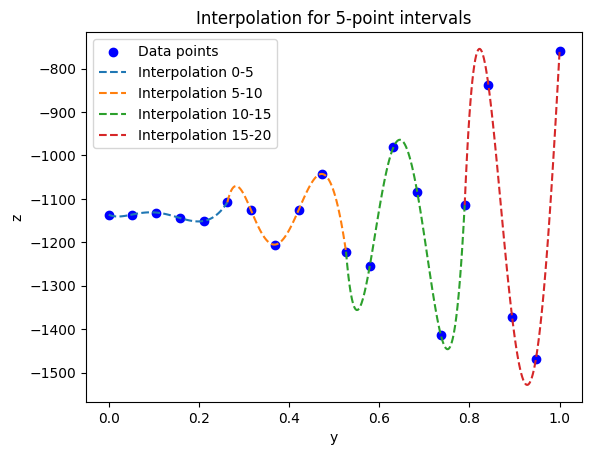

In [4]:
interpolates(data.x, data.y)

In [5]:
interpolator = interpolate.make_interp_spline(data.x, data.y, k=5)
xlin = np.linspace(data.x.min(), data.x.max(), 2000)

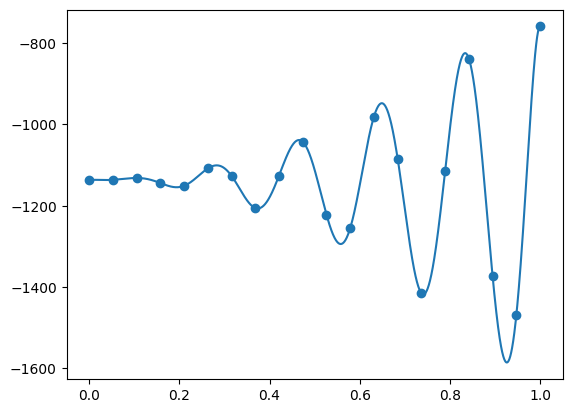

In [6]:
fig, axe = plt.subplots()
axe.scatter(data.x, data.y)
axe.plot(xlin, interpolator(xlin))

In [9]:
P = np.poly1d([1,2,3,4,5,6])

In [12]:
x = np.arange(0, 5)
y = P(x)

In [14]:
xlin = np.linspace(-1, 6, 100)
ylin = P(xlin)

In [20]:
np.polyfit(x, y, 4)

array([ 12., -32.,  54., -19.,   6.])

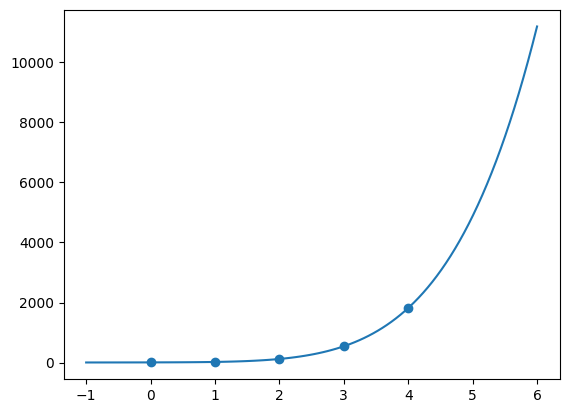

In [15]:
fig, axe = plt.subplots()
axe.scatter(x, y)
axe.plot(xlin, ylin)